# Simple Linear Regression (from scratch)

by Anthony Clark

In my repository "ML-22", there are 22 different machine learning algorithms that I wrote in python "from scratch". As I explained in the "README", the term "from scratch" is a bit presumptuous. I still use libraries such as numpy for mathematical functions, pandas for data loading and matplotlib for visualizations. 

The first algorithm is perhaps the most popular and straightfoward method, linear regression, more specifically simple linear regression. Most people wouldn't even consider this a machine learning algorithm on account of "simple" it is. That being said, SLR sets the foundation for subsequent, more complicated ML models. It might be simple, but it's a very good place to start.

# Libraries

In [153]:
import numpy as np # numpy for matrix multiplication/linear algebra
import pandas as pd # load in data
import matplotlib.pyplot as plt # data viz

In [154]:
#Before we talk about the math, let's load in a very simple data file and visualize it
#You can find the "Salary.csv" in my ML-22 datasets repository

df = pd.read_csv("Salary_dataset.csv") #load in data
df = df.drop("Unnamed: 0", axis = 1) #Drop unnecessary column
#print shape and look at the first 10 rows
print(df.shape)
print("\n\n\n")
print(df.head(10))

(30, 2)




   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0
5              3.0  56643.0
6              3.1  60151.0
7              3.3  54446.0
8              3.3  64446.0
9              3.8  57190.0


This is a dataset that has two variables "YearsExperience" and "Salary"

Since salary is dependent on "YearsExperience", "Salary" will be our target variable

This is the variable we're going to predict and we're going to use "YearsExperience" to predict it

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
#Because we only care about "YearsExperience" and "Salary"
#We're going to set them equal to X and y respectively, using numpy

X = np.array(df['YearsExperience']) #Predictor Variable
y = np.array(df['Salary']) # Target Variable

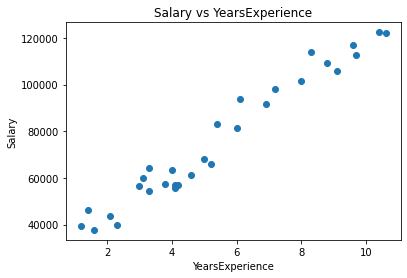

In [157]:
#When we visualize their relationship, we can see if there's a linear trend

plt.scatter(df['YearsExperience'], df['Salary'])

# Add labels and title (optional, but recommended)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Salary vs YearsExperience")

# Display the plot
plt.show()

There is a very clear linear trend between these two variables
??
So if we wanted to build a model that can take someone's YearsExperience and predict their salary, how would we do that?

Well we could draw a line approximating that trend and then use the equation of that line to plug in X "YearsExperience" and calculate y "Salary"

Simple y = mx + b

But how do we get that line?

Why choose one line over any other?

I'm sure you're familiar with the term "line best fit", but what makes a line "best fit"?

Before you answer that question, think about what makes a line NOT a good fit. Well, if you make a prediction on that line and the actual value is really far away from you predicted value, that would be a bad fit.

The difference between your predicted line value and the corresponding actual value, given an input of X, is known as a...

# Residual

These will be our guiding light for finding the line best fit

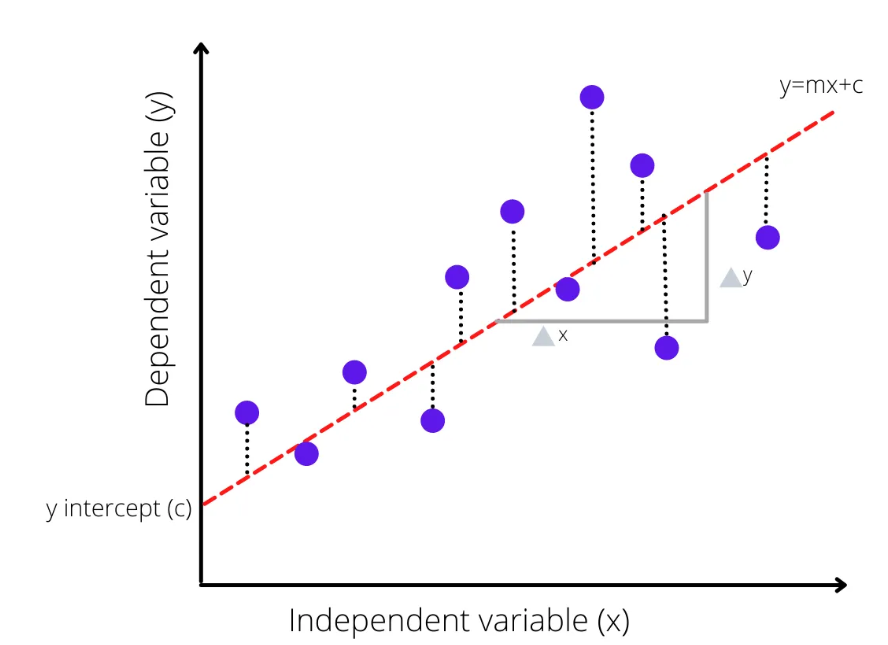

If we draw a line, we can calculate the residual for every single input of X. We just plug in X in our equation, get a y predictino (y_pred) and then take the difference between y_pred and the actual y.

If we take all the differences, given every input X, and average them this is known as the

# Mean residual

But the difficulty with the mean residual is that some residuals are going to be above the line (positive) and some residuals are going to be below the line (negative). This is bad because we want to know the total magnitude of the mean residual.

To avoid this we could could take the absolute value of all the residuals or we could square the residuals.

It turns out we actually square the residuals because it accomplishes two things:
1) It makes all the residuals positive 
2) It exaggerates the differences between residuals, making outliers contribute more to the mean

The average of all the squaured residuals is known as the 

# Mean Squared Error or (MSE)

It is formalized by the following equation

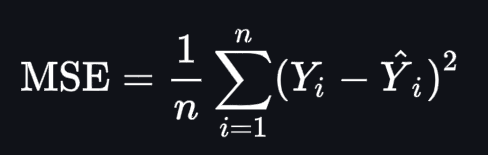

So you're 
-using the line equation and value of X to get a y prediction

-taking the difference with respect to the actual y value

-squaring that difference to get the square residual

-summing all the square residuals 

# This is known as the SSR or (Sum of Squared Residuals)

-and then dividing by the total amount of data points to get an average/mean

The line with the lowest MSE will be the line best fit

Pretty simple?

But there's kind of a tautological argument going on. How are you getting your prediction if you need your prediction to calculate the equation that's used to make the original prediction?

Do you just start with a random line and then choose lines and tabulate all of the MSEs, then find the lowest one?

That would be pretty computationally expensive, although it's not out of the question.


We can use the 

# Least Squares Method

Now this method luckily has been defined mathematically

But let's try some random lines and then rotate them to see if we can get something to work.

We also have to calculate the equation of each line and then the corresponding MSE/SSR.

We can then plot the values of MSE and SSR for each line with respect to the slope and get an idea of how the error is changing as the slope of the line is changed.

We're actually going to focus on SSR because SSR is differentiable.


So, I'm going to eyeball the graph and pick some x-coordinates and y-coordinates that might yield a good line


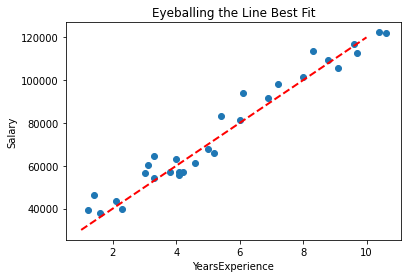

In [158]:
#The following code plots X & y and draws a custom line

#The custom line is just made by picking some x-coordinates and y-coordinates, there's no math it's just eyeballing
# Create the scatter plot
plt.scatter(df["YearsExperience"], df["Salary"])

x_coords = [1, 10]  # x-coordinates of the two points
y_coords = [30000, 120000]  # y-coordinates of the two points

# Draw custom lines
plt.plot(x_coords, y_coords, color='red', linestyle='--', linewidth=2, label="Custom line")
#plt.axhline(y=3, color='green', linestyle=':', label="Horizontal line")
#plt.axvline(x=2, color='blue', linestyle='-.', label="Vertical line")

# Customize the plot
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Eyeballing the Line Best Fit")

# Show the plot
plt.show()

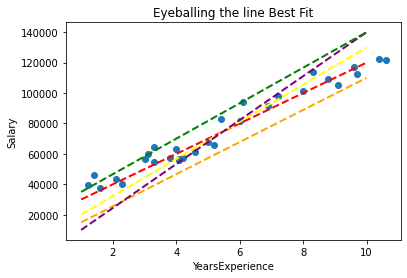

In [159]:
#well this was actually a really good line, eyeballing works well because the variables are so clearly linear

#Let's pick some other coordinates

#I'm going to add four more lines so there will be 5 custom drawn lines in total

#We'll use the same x-coordinates and just change the y-coordinates for each line

plt.scatter(df["YearsExperience"], df["Salary"])

#Coordinates for line #1, in red
x1_coords = [1, 10]  # x-coordinates of the two points
y1_coords = [30000, 120000]  # y-coordinates of the two points

#Coordinates for line #2, in yellow

y2_coords = [20000, 130000]

#Coordinates for line #3, in orange

y3_coords = [15000, 110000]

#Coordinates for line #4, in purple

y4_coords = [10000, 140000]

#Coordinates for line #5, in green

y5_coords = [35000, 140000]  # y-coordinates of the two points

# plot line #1
plt.plot(x1_coords, y1_coords, color='red', linestyle='--', linewidth=2)
# plot line #2
plt.plot(x1_coords, y2_coords, color='yellow', linestyle='--', linewidth=2)
# plot line #3
plt.plot(x1_coords, y3_coords, color='orange', linestyle='--', linewidth=2)
# plot line #4
plt.plot(x1_coords, y4_coords, color='purple', linestyle='--', linewidth=2)
# plot line #5
plt.plot(x1_coords, y5_coords, color='green', linestyle='--', linewidth=2)

#plt.axhline(y=3, color='green', linestyle=':', label="Horizontal line")
#plt.axvline(x=2, color='blue', linestyle='-.', label="Vertical line")

# Customize the plot
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Eyeballing the line Best Fit")

# Show the plot
plt.show()

As you can see, some of these lines are better than others

How do we know if we're getting warmer or colder?

Well we can choose a bunch of slopes for lines, calculate the sum of square residuals (SSR) and then plot the SSR with respect to slope

Because lines are comprised of both slope and intercept, it's important for us to set an intercept and only change the slope

Let's set an intercept of $20,000, that's about how much someone with zero years of experience will make according to our data

In [160]:
#Remeber slope is rise over run
b = 20000 #Set intercept to $20,000

s1 = (120000 -30000)/(10-1) #calculate slope one based off of eyeballed coordinates
s1

10000.0

So Salary increases about $10,000 per Year of experience, this is just according to our eyeballed line

the formal equation will be 

Salary = 10,000 * (YearsExperience) + $20,000

Let's change the slope by 2500 and get different lines

Line1: Salary = 10,000 * (YearsExperience) + $20,000
Line2: Salary = 12,500 * (YearsExperience) + $20,000
Line3: Salary = 15,000 * (YearsExperience) + $20,000
Line4: Salary = 7,500 * (YearsExperience) + $20,000
Line5: Salary = 20,000 * (YearsExperience) + $20,000

Now we can use these lines to make predictions based on our data

We're going to calculate 5 columns of predictions, each based on our five different lines

We're going to call these columns y_pred1, y_pred2, y_pred3, y_pred4, y_pred5

In [161]:
s1, s2, s3, s4, s5 = 10000, 12500, 15000, 7500, 20000

df["y_pred1"] = ((s1*df["YearsExperience"]) + 20000)
df["y_pred2"] = ((s2*df["YearsExperience"]) + 20000)
df["y_pred3"] = ((s3*df["YearsExperience"]) + 20000)
df["y_pred4"] = ((s4*df["YearsExperience"]) + 20000)
df["y_pred5"] = ((s5*df["YearsExperience"]) + 20000)

df.head(10)

,YearsExperience,Salary,y_pred1,y_pred2,y_pred3,y_pred4,y_pred5
0,1.2,39344.0,32000.0,35000.0,38000.0,29000.0,44000.0
1,1.4,46206.0,34000.0,37500.0,41000.0,30500.0,48000.0
2,1.6,37732.0,36000.0,40000.0,44000.0,32000.0,52000.0
3,2.1,43526.0,41000.0,46250.0,51500.0,35750.0,62000.0
4,2.3,39892.0,43000.0,48750.0,54500.0,37250.0,66000.0
5,3.0,56643.0,50000.0,57500.0,65000.0,42500.0,80000.0
6,3.1,60151.0,51000.0,58750.0,66500.0,43250.0,82000.0
7,3.3,54446.0,53000.0,61250.0,69500.0,44750.0,86000.0
8,3.3,64446.0,53000.0,61250.0,69500.0,44750.0,86000.0
9,3.8,57190.0,58000.0,67500.0,77000.0,48500.0,96000.0


In [162]:
#Now we're going to calculate the squared residuals of every prediction
#we'll call them SR_1, SR_2, SR_3, SR_4, SR_5

df["SR_1"] = (df["y_pred1"] - df["Salary"])**2 
df["SR_2"] = (df["y_pred2"] - df["Salary"])**2 
df["SR_3"] = (df["y_pred3"] - df["Salary"])**2 
df["SR_4"] = (df["y_pred4"] - df["Salary"])**2 
df["SR_5"] = (df["y_pred5"] - df["Salary"])**2 

df.head(10)

,YearsExperience,Salary,y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,SR_1,SR_2,SR_3,SR_4,SR_5
0,1.2,39344.0,32000.0,35000.0,38000.0,29000.0,44000.0,53934336.0,18870336.0,1806336.0,106998336.0,2.167834e+07
1,1.4,46206.0,34000.0,37500.0,41000.0,30500.0,48000.0,148986436.0,75794436.0,27102436.0,246678436.0,3.218436e+06
2,1.6,37732.0,36000.0,40000.0,44000.0,32000.0,52000.0,2999824.0,5143824.0,39287824.0,32855824.0,2.035758e+08
3,2.1,43526.0,41000.0,46250.0,51500.0,35750.0,62000.0,6380676.0,7420176.0,63584676.0,60466176.0,3.412887e+08
4,2.3,39892.0,43000.0,48750.0,54500.0,37250.0,66000.0,9659664.0,78464164.0,213393664.0,6980164.0,6.816277e+08
5,3.0,56643.0,50000.0,57500.0,65000.0,42500.0,80000.0,44129449.0,734449.0,69839449.0,200024449.0,5.455494e+08
6,3.1,60151.0,51000.0,58750.0,66500.0,43250.0,82000.0,83740801.0,1962801.0,40309801.0,285643801.0,4.773788e+08
7,3.3,54446.0,53000.0,61250.0,69500.0,44750.0,86000.0,2090916.0,46294416.0,226622916.0,94012416.0,9.956549e+08
8,3.3,64446.0,53000.0,61250.0,69500.0,44750.0,86000.0,131010916.0,10214416.0,25542916.0,387932416.0,4.645749e+08
9,3.8,57190.0,58000.0,67500.0,77000.0,48500.0,96000.0,656100.0,106296100.0,392436100.0,75516100.0,1.506216e+09


Now our dataframe is getting big, but we can take the sum of the last five columns and get the sum of squared residuals

We can then plot our SSR with our slopes

In [163]:
#Get the sum of all of the squared residuals for each line
SSR1 = df["SR_1"].sum()
SSR2 = df["SR_2"].sum()
SSR3 = df["SR_3"].sum()
SSR4 = df["SR_4"].sum()
SSR5 = df["SR_5"].sum()


SSRs = np.array([SSR1, SSR2, SSR3, SSR4, SSR5]) #store the SSRs in a np.array
slopes = np.array([s1, s2, s3, s4, s5]) #store the corresponding slopes in a np.array

In [164]:
type(SSR1)

numpy.float64

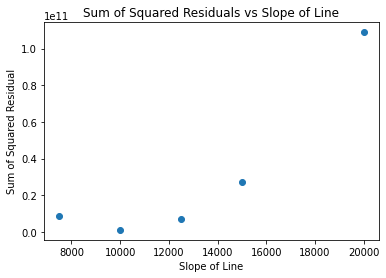

In [165]:
# We can now plot the sum of squared residuals with each corresponding slope
plt.scatter(slopes, SSRs)
# Customize the plot
plt.xlabel("Slope of Line")
plt.ylabel("Sum of Squared Residual")
plt.title("Sum of Squared Residuals vs Slope of Line")

# Show the plot
plt.show()

So if you look at this chart, what slope has the LOWEST corresponding sum of squared residuals?

Slope of 10,000 has the lowest corresponding SSR, but thats just based on the points we picked

How do we know what has the theoretical lowest?

We'll if we treat the relationship between slope of line and the Sum of squared residuals as a function, we can take the 1st deriative of that function and we'll the inflection point. 

This is the point where the slope of the function is zero, this is the minimum and therefore the theoretical lowest possible SSR. 

Which would correspond to the

# Line best fit

I'm not going to walk through all the calculus, but basically at the end you get an equation that looks like this

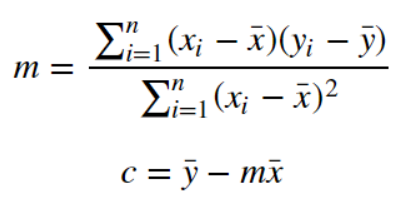

Where m = slope

and c = intercept

This is actually very elegant and straightforward we can do this very easily 

But first let's go back to our original df with just "YearsExperience" and "Salary"

In [166]:
df_calc = df[["YearsExperience", "Salary"]]

Now we rewrite this a couple of ways, but I think it's best to just solve as  is

In [167]:
#Calculate y-bar and x-bar

y_bar = df_calc["Salary"].mean()
x_bar = df_calc["YearsExperience"].mean()

df_calc["xi-x_bar"] = (df_calc["YearsExperience"] - x_bar)
df_calc["yi-y_bar"] = (df_calc["Salary"] - y_bar)
df_calc["xi-x_bar_squared"] = ((df_calc["YearsExperience"] - x_bar)**2)
df_calc["xy"] = (df_calc["xi-x_bar"]*df_calc["yi-y_bar"])

df_calc.head(5)

,YearsExperience,Salary,xi-x_bar,yi-y_bar,xi-x_bar_squared,xy
0,1.2,39344.0,-4.213333,-36660.0,17.752178,154460.800000
1,1.4,46206.0,-4.013333,-29798.0,16.106844,119589.306667
2,1.6,37732.0,-3.813333,-38272.0,14.541511,145943.893333
3,2.1,43526.0,-3.313333,-32478.0,10.978178,107610.440000
4,2.3,39892.0,-3.113333,-36112.0,9.692844,112428.693333


In [168]:
#Now we take the sum of these three new values and we can compute the slope

sum_xy = df_calc["xy"].sum() #sum the numerator
sum_x2 = df_calc["xi-x_bar_squared"].sum() #sum the denominator

m = sum_xy / sum_x2 # calculate slope
print("The slope for the line best fit is ", m)

The slope for the line best fit is  9449.962321455077


We were very close with our guess of 10,000, but 9,449.96 gives us the equation for the best fit

Let's use the slope to calculate the intercept

In [169]:
c = y_bar - (m*x_bar)

c

24848.203966523193

We were also pretty close guessing that the intercept was around $20,000

Let's use this equation to get a new pred on our df

We'll call this new df "df_bestfit"

In [170]:
df_bestfit = df[["YearsExperience", "Salary"]] #Just take YearsExperience and Salary

df_bestfit["y_pred_bestfit"] = ((df_bestfit["YearsExperience"]*m) + c)

df_bestfit.head(10)

,YearsExperience,Salary,y_pred_bestfit
0,1.2,39344.0,36188.158752
1,1.4,46206.0,38078.151217
2,1.6,37732.0,39968.143681
3,2.1,43526.0,44693.124842
4,2.3,39892.0,46583.117306
5,3.0,56643.0,53198.090931
6,3.1,60151.0,54143.087163
7,3.3,54446.0,56033.079627
8,3.3,64446.0,56033.079627
9,3.8,57190.0,60758.060788


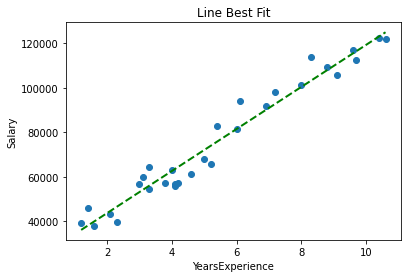

In [171]:
plt.scatter(df_bestfit["YearsExperience"], df_bestfit["Salary"])
plt.plot(df_bestfit["YearsExperience"], df_bestfit["y_pred_bestfit"], color='green', linestyle='--', linewidth=2)

#Labels
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Line Best Fit")

# Show the plot
plt.show()

We have now found the line best fit.

A good way to check our work is by calculating an MSE and then comparing it with the sklearn linear regression model

First, let's calculate an MSE

Actually, we're going to look at the root mean squared error because the numbers are very large


In [172]:
df_bestfit["Squared Residuals"]= ((df_bestfit["y_pred_bestfit"] - df_bestfit["Salary"])**2)
RMSE = ((df_bestfit["Squared Residuals"].sum())/df_bestfit.shape[0])**0.5
RMSE

5592.0436087606595

In [173]:
#import sklearn to evaluate our from scratch model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [174]:
#Define X and y, denoted with skl "sklearn" to avoid confusion
X_skl = np.array(df["YearsExperience"]) # X is YearExperience
y_skl = np.array(df["Salary"]) # y is target "Salary"

#You have to reshape the features so they're in column format
X_skl = X_skl.reshape(-1, 1)

In [175]:
#Initialize model
model = LinearRegression()
#Fit model
model.fit(X_skl, y_skl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Compare the two model coefficients,

our from scratch model vs theirs 



In [176]:
Model_Difference = (model.coef_ - m)*100
print("The percent difference between the two model coefficients is ", Model_Difference, "%")

The percent difference between the two model coefficients is  [-1.8189894e-10] %


That's not bad, we were one millionth of a percentage off. I'd say that's a rounding error.

# Compare the two model intercepts

In [177]:
Intercept_Difference = (model.intercept_ - c)*100
print("The percent difference between the two model intercepts is ", Intercept_Difference, "%")

The percent difference between the two model intercepts is  7.275957614183426e-10 %


Also a very small difference

# Compare root mean squared error (RMSE)

In order to do this we first need to make predictions using the sklearn linear regression model

In [178]:
#Make predictions using the sklearn model
y_sklearn_pred = model.predict(X_skl)

In [179]:
# Import RMSE function from sklearn
from sklearn.metrics import mean_squared_error

#sklearn rmse_mse
rmse_mse = np.sqrt(mean_squared_error(y_skl, y_sklearn_pred))

#Compare the difference

rmse_difference = abs((rmse_mse - RMSE))*100
print("The difference between the model RMSE is ", rmse_difference, "%")

The difference between the model RMSE is  0.0 %


Pretty good score

In summary, when comparing the two models

In [180]:
data_compare = {'From Scratch': [m, c, RMSE], 'Sklearn': [model.coef_ ,model.intercept_, rmse_mse ], 
                '% Difference Between Models':[Model_Difference, Intercept_Difference, rmse_difference]}
index_names = ['Coefficient', 'Intercept', 'RMSE']
df_compare = pd.DataFrame(data_compare, index=index_names)
print(df_compare)

             From Scratch              Sklearn % Difference Between Models
Coefficient   9449.962321  [9449.962321455076]   [-1.8189894035458565e-10]
Intercept    24848.203967              24848.2                 7.27596e-10
RMSE          5592.043609              5592.04                           0
